By: Nitish Adhikari

Contact : nitishbuzzpro@gmail.com  

Linkdin: https://www.linkedin.com/in/nitish-adhikari-6b2350248


# Linear Regression Project

An Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. 


## Imports
Import pandas, numpy, matplotlib,and seaborn. 

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import piplite
await piplite.install('seaborn')
import seaborn as sns
import pickle

In [74]:
%matplotlib inline

## Get the Data

Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 



In [75]:
customers = pd.read_csv('Ecommerce Customers')

**Checking the head of customers, and checking out its info() and describe() methods.**

In [76]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [77]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [78]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 25.5+ KB


## Exploratory Data Analysis


___
**Using seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. 

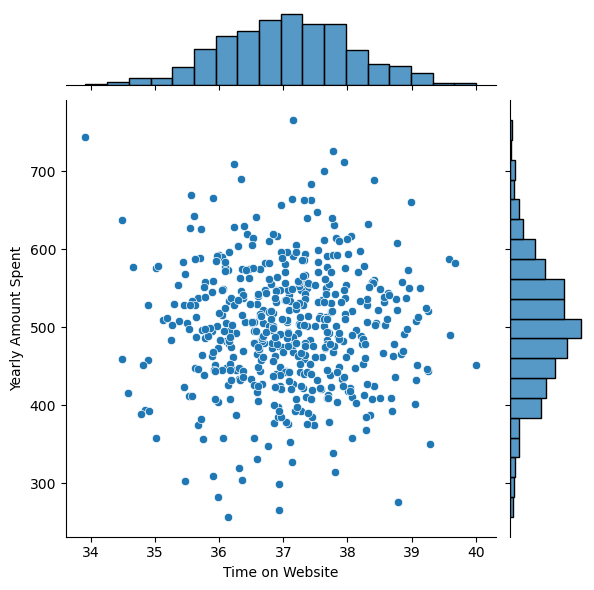

In [79]:
sns.jointplot(data=customers,x='Time on Website',y='Yearly Amount Spent')

** Doing the same but with the Time on App column instead. **

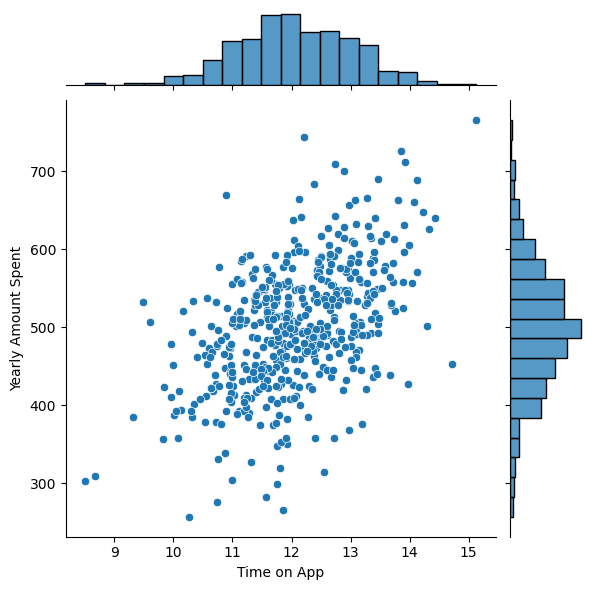

In [80]:
sns.jointplot(data=customers,x='Time on App',y='Yearly Amount Spent')

** Using jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

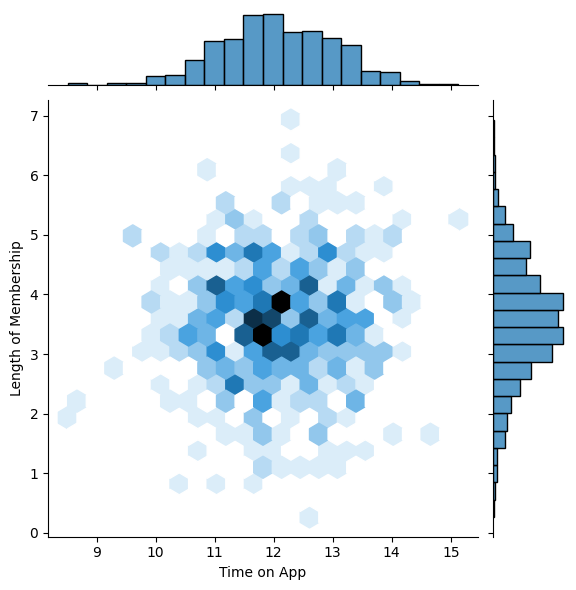

In [81]:
sns.jointplot(data=customers,x='Time on App',y='Length of Membership', kind='hex')

**exploring these types of relationships across the entire data set. Using [pairplot]

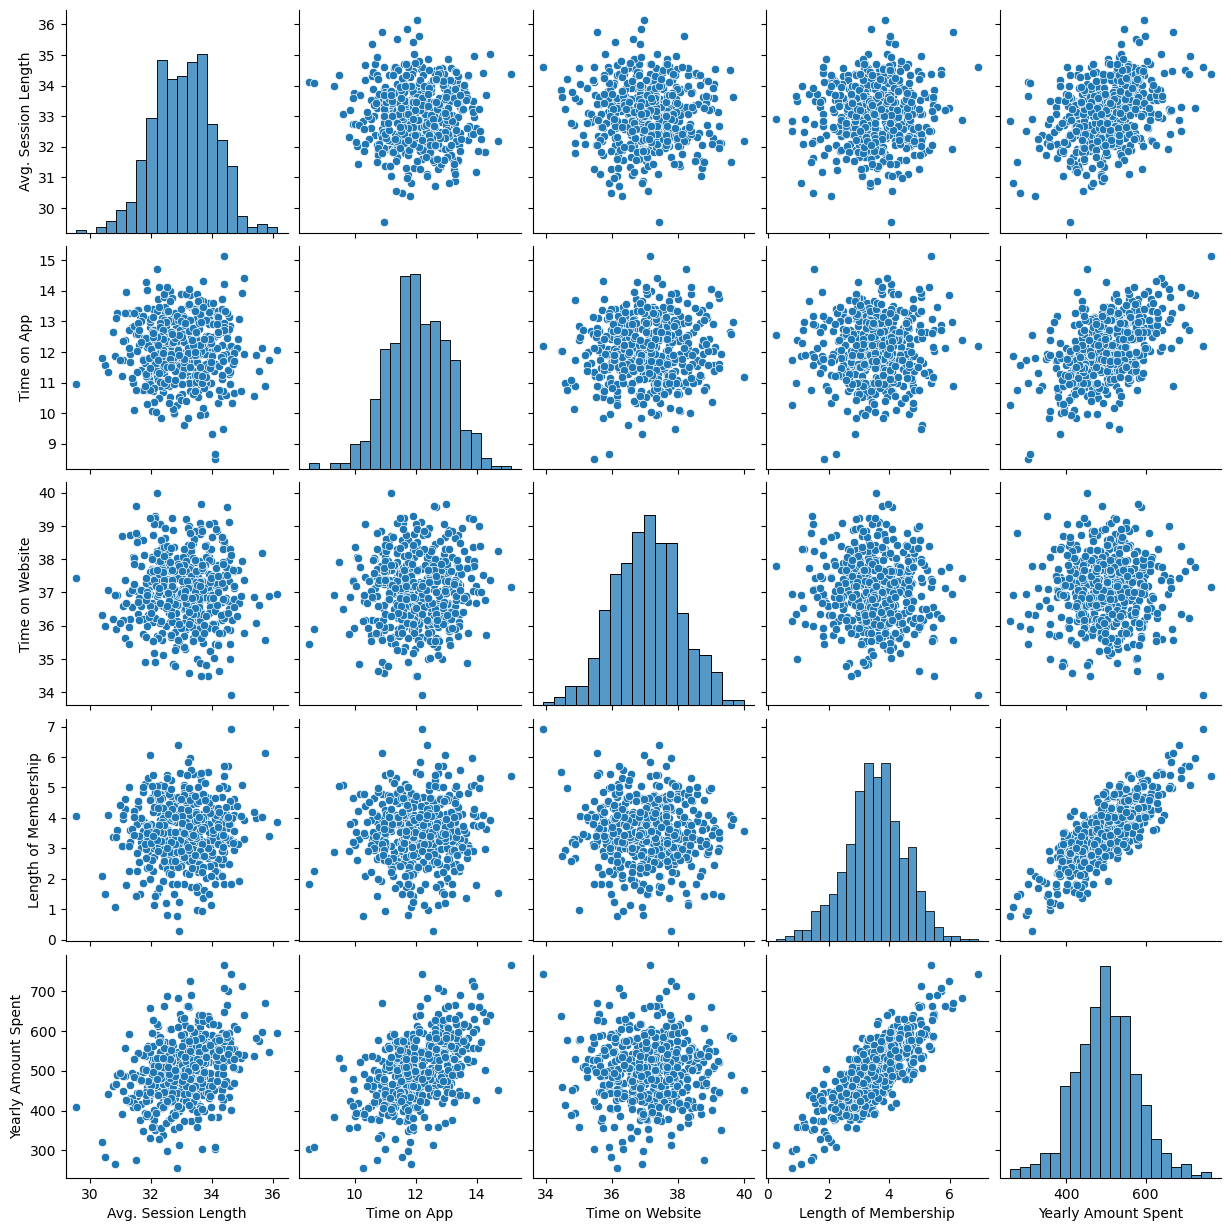

In [82]:
sns.pairplot(customers)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [83]:
#Length of Membership

**Creating a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

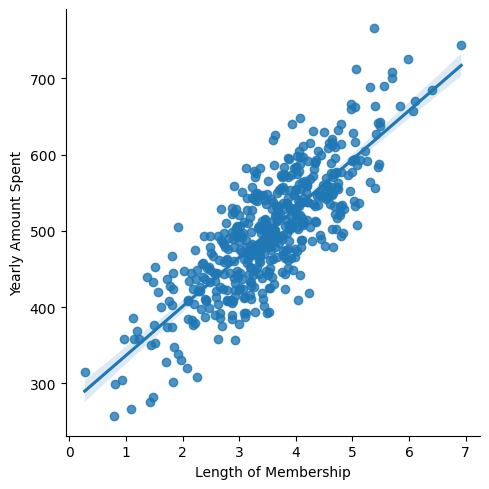

In [84]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent', data=customers)

## Training and Testing Data

split the data into training and testing sets.
** Setting a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [85]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [86]:
y = customers['Yearly Amount Spent']

In [87]:
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

** Using model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3**

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Training the Model

** Importing LinearRegression from sklearn.linear_model **

In [90]:
from sklearn.linear_model import LinearRegression

**Creating an instance of a LinearRegression() model named lm.**

In [91]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [92]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [93]:
lm.coef_

array([26.50389067, 38.94287292,  0.7118327 , 60.91488543])

## Predicting Test Data
Evaluating its performance by predicting off the test values!

** Using lm.predict() to predict off the X_test set of the data.**

In [94]:
predictions = lm.predict(X_test)

** Creating a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Values')

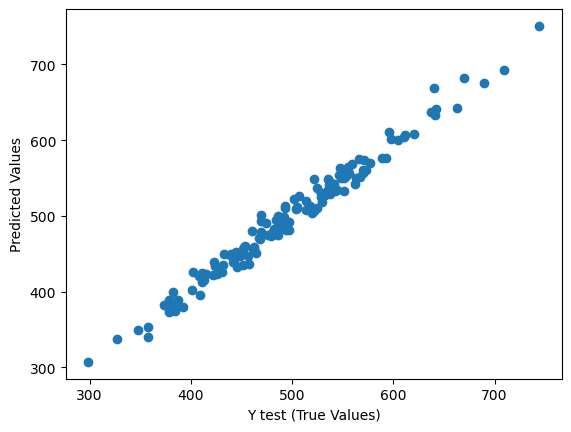

In [95]:
plt.scatter(y_test,predictions)
plt.xlabel('Y test (True Values)')
plt.ylabel('Predicted Values')

## Evaluating the Model

Evaluating our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [96]:
from sklearn import metrics

In [97]:
print('MAE', metrics.mean_absolute_error(y_test,predictions))
print('MAE', metrics.mean_squared_error(y_test,predictions))
print('MAE', np.sqrt(metrics.mean_absolute_error(y_test,predictions)))

MAE 8.686534277933113
MAE 117.59787233598036
MAE 2.9472927031316574


In [98]:
metrics.explained_variance_score(y_test,predictions)

0.9807233576918419

## Residuals



**Ploting a histogram of the residuals and make sure it looks normally distributed**

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Count'>

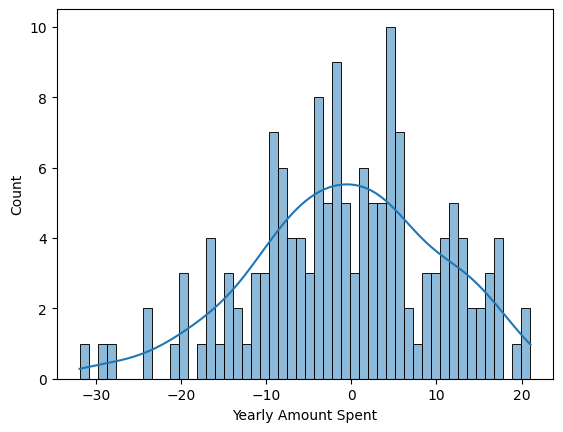

In [99]:
sns.histplot((y_test-predictions),bins=50, kde=True)

## Conclusion

Recreating the dataframe below. 

In [100]:
cdf = pd.DataFrame(lm.coef_,X.columns, columns=['Coeff'])

cdf

,Coeff
Avg. Session Length,26.503891
Time on App,38.942873
Time on Website,0.711833
Length of Membership,60.914885


Interpreting these coefficients? 

1. Unit increase in Avg. Session Length, leads to $25.98 increase in yearly amount spent

2. Unit increase in Time on App, leads to $38.59 increase in yearly amount spent

3. Unit increase in Time on Website, leads to $0.19 increase in yearly amount spent

4. Unit increase in Length of Membership	, leads to $61.27 increase in yearly amount spent

In [101]:
#Save the model
with open('Ecommerce-Linear Regression.pkl','wb') as file:
    pickle.dump(lm,file)